In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
img = cv.imread("/content/prac_picture_1.png")

In [ ]:
print(img.shape)

(1960, 1960, 3)


In [ ]:
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
print(gray_img.shape)

(1960, 1960)


In [ ]:
new_width = 300
new_height = 200
new_points = (new_width, new_height)
resized_img = cv.resize(gray_img, new_points, interpolation= cv.INTER_LINEAR)

In [ ]:
print(resized_img.shape)

(200, 300)


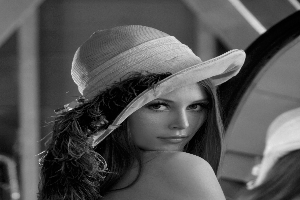

In [ ]:
cv2_imshow(resized_img)

In [ ]:
img_gaussian = cv.GaussianBlur(resized_img,(3,3),0)

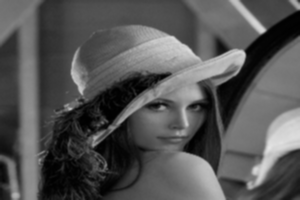

In [ ]:
cv2_imshow(img_gaussian)

# PREWITT EDGE DETECTOR

In [ ]:
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

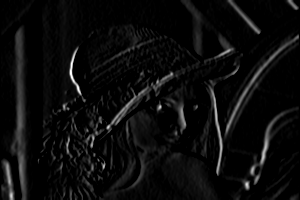

In [ ]:
cv2_imshow(img_prewittx)

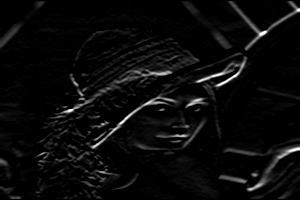

In [ ]:
cv2_imshow(img_prewitty)

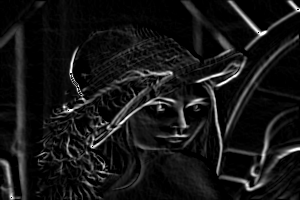

In [ ]:
cv2_imshow(img_prewittx + img_prewitty)

##  
**Pros**:

Simple to implement.

Can detect edges in multiple directions.

**Cons**:

Sensitive to noise in the input image.
Can miss edges that are not aligned with the detection kernel.

# SOBEL EDGE DETECTION

In [ ]:
sobelx = cv.Sobel(img_gaussian, -1, 1, 0)
sobely = cv.Sobel(img_gaussian, -1, 0, 1)
sobelxy = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

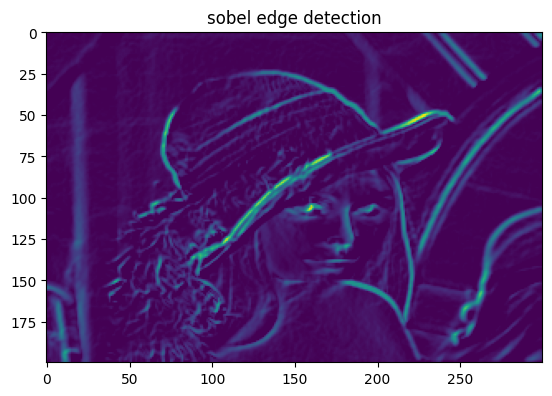

In [ ]:
plt.title("sobel edge detection")
plt.imshow(sobelxy)
plt.show()

##  

Pros:

More accurate than Prewitt due to the use of a Gaussian smoothing filter.

Can detect edges in multiple directions.

Cons:

sharp edges are not formed in the output.

Can miss edges that are not aligned with the detection kernel.

# LAPLACIAN EGDE DETECTION

In [ ]:
laplacian = cv.Laplacian(img_gaussian,-1)

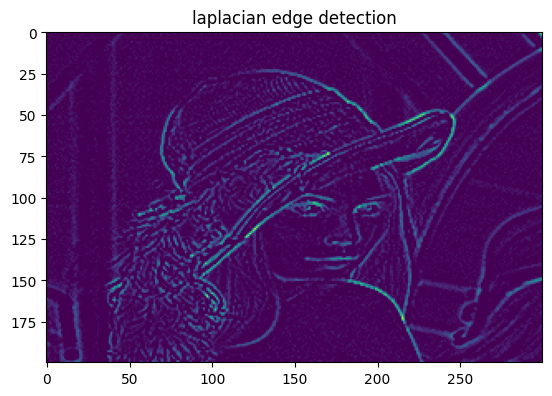

In [ ]:
plt.title("laplacian edge detection")
plt.imshow(laplacian)
plt.show()

##  
Pros:

It is cheaper to implement than the gradient (i.e., one mask only)

Cons:

It does not provide information about edge direction.

It is more sensitive to noise (i.e., differentiates twice).

# CANNY EDGE DETECTION

In [ ]:
canny = cv.Canny(img_gaussian,80,150)

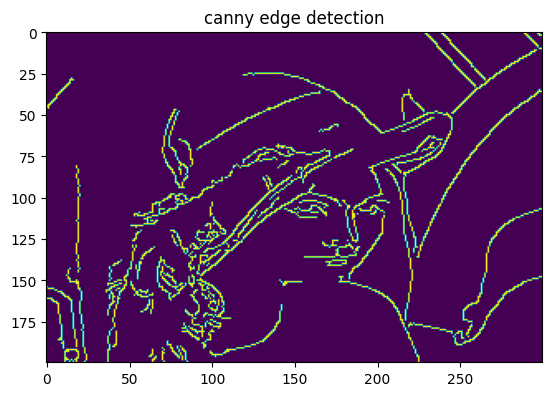

In [ ]:
plt.title("canny edge detection")
plt.imshow(canny)
plt.show()

##    
Pros:

High accuracy and low error rate.

Sharp edges are obtained

Cons:

Computationally intensive.

# ROBERT CROSS EDGE OPERATOR

In [ ]:
kerny = np.array([[1, 0], [0, -1]])
kernx = np.array([[0, 1], [-1, 0]])
img_robertx = cv.filter2D(img_gaussian, -1, kernelx)
img_roberty = cv.filter2D(img_gaussian, -1, kernely)
robertxy = cv.addWeighted(img_robertx, 0.5, img_roberty, 0.5, 0)

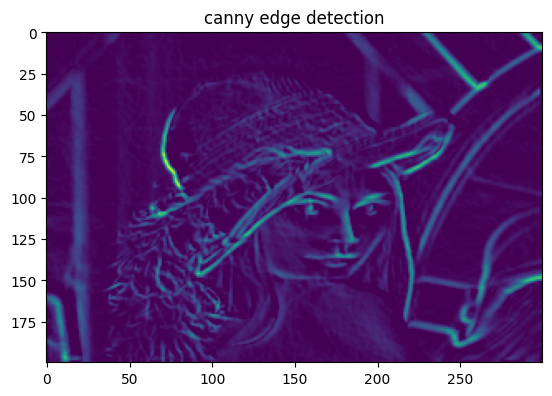

In [ ]:
plt.title("canny edge detection")
plt.imshow(robertxy)
plt.show()


Pros:

Very simple to implement.

Good for detecting edges in a single direction.

Cons:

Sensitive to noise in the input image.

Produces thin edges that may not be visible.